In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.model_selection import cross_val_score


%matplotlib inline

train = pd.read_csv('/Users/olgakliuchnik/Desktop/08-07/class material/Unit 3/data/iowa_housing/train.csv')
test  = pd.read_csv('/Users/olgakliuchnik/Desktop/08-07/class material/Unit 3/data/iowa_housing/test.csv')

In [2]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#Breakdown dolumns into numerical and categorical 
numerical = [col for col in test.columns if test.dtypes[col] != 'object']
categorical = [col for col in test.columns if test.dtypes[col] == 'object']

print(numerical)

print('\n\n', categorical)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', '

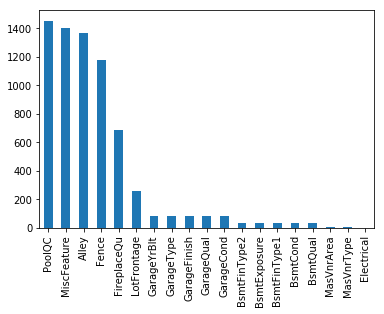

In [8]:
null_values = train.isnull().sum()
null_values = null_values[null_values > 0]
null_values.sort_values(ascending = False).plot.bar()

In [9]:
#To check missing counts 
train.isnull().sum().sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

Text(0.5, 1.0, 'Check outliers')

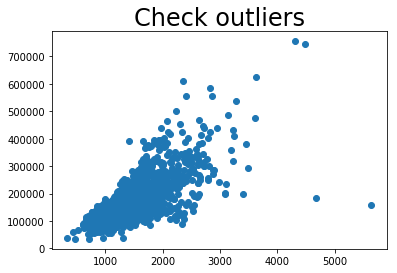

In [10]:
plt.scatter(train.GrLivArea, train.SalePrice)
plt.title('Check outliers', fontsize = 24)

In [11]:
#Right outliers will be all the houses that are more than 4000ft and $650,000
train = train[(train.GrLivArea < 4000) & (train.SalePrice < 650000)]
print(train.shape, test.shape)

(1456, 81) (1459, 80)


In [12]:
#Left outliers will be all the houses that are less than 500ft and $70,000
train = train[(train.GrLivArea > 500) & (train.SalePrice > 70000)]
print(train.shape, test.shape)

(1434, 81) (1459, 80)


Text(0.5, 1.0, 'Without outliers')

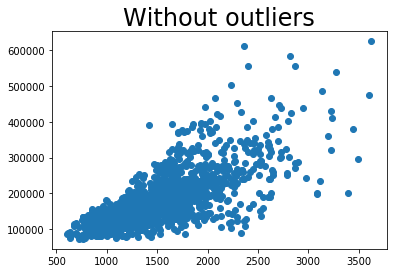

In [13]:
plt.scatter(train.GrLivArea, train.SalePrice)
plt.title('Without outliers', fontsize = 24)

In [14]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1434.000000,1434.000000,1176.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1426.000000,1434.000000,...,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000,1434.000000
mean,729.417015,57.154812,69.861395,10497.048117,6.128312,5.597629,1971.797071,1985.259414,103.662693,442.313110,...,95.200139,46.513947,21.605997,3.471409,15.334031,2.087169,41.799163,6.331241,2007.808229,182063.116457
std,421.894980,42.406596,23.036223,9925.354922,1.333028,1.095200,29.965343,20.405408,178.244899,430.871159,...,125.649024,64.412294,60.943148,29.578468,56.223714,35.653427,492.170633,2.686928,1.329325,75688.622152
min,1.000000,20.000000,21.000000,1300.000000,3.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,72500.000000
25%,361.250000,20.000000,59.750000,7579.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,731.500000,50.000000,70.000000,9504.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,387.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164500.000000
75%,1093.750000,70.000000,80.000000,11616.000000,7.000000,6.000000,2001.000000,2004.000000,167.750000,715.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214800.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,625000.000000


In [15]:
#What is correlation between other columns and Price
correlation = train.corr()["SalePrice"].sort_values(ascending = False)
correlation

SalePrice        1.000000
OverallQual      0.796129
GrLivArea        0.713148
TotalBsmtSF      0.640592
GarageCars       0.638730
GarageArea       0.626613
1stFlrSF         0.617128
FullBath         0.551335
TotRmsAbvGrd     0.527199
YearBuilt        0.520956
YearRemodAdd     0.506685
GarageYrBlt      0.489839
MasVnrArea       0.475479
Fireplaces       0.458837
BsmtFinSF1       0.386177
LotFrontage      0.356568
OpenPorchSF      0.338929
WoodDeckSF       0.312357
2ndFlrSF         0.291752
HalfBath         0.275263
LotArea          0.267634
BsmtFullBath     0.230114
BsmtUnfSF        0.222160
BedroomAbvGr     0.140157
ScreenPorch      0.113991
MoSold           0.055638
3SsnPorch        0.045451
PoolArea         0.032032
YrSold          -0.013455
BsmtFinSF2      -0.014361
MiscVal         -0.015726
Id              -0.026223
LowQualFinSF    -0.028954
BsmtHalfBath    -0.043693
MSSubClass      -0.101026
OverallCond     -0.116506
EnclosedPorch   -0.123035
KitchenAbvGr    -0.142862
Name: SalePr

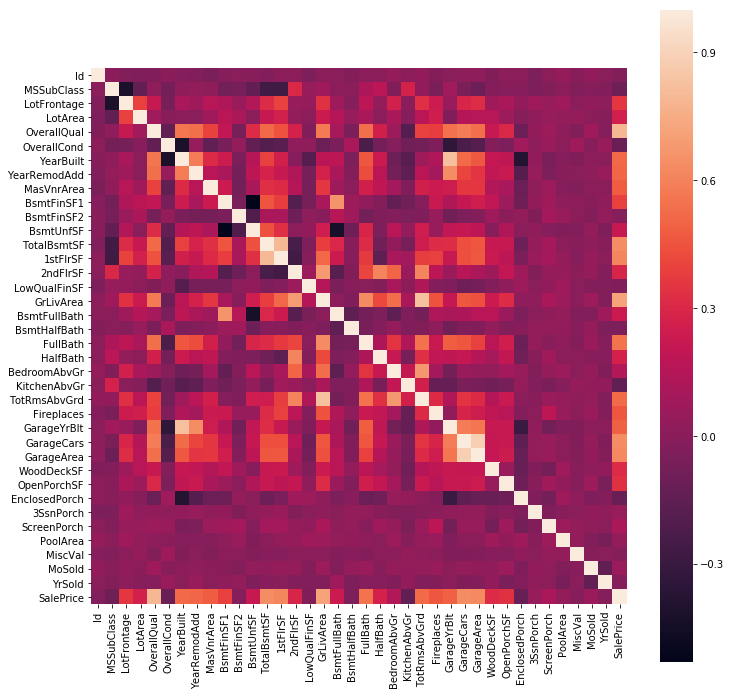

In [16]:
#Correlation Chart
corr = train.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, vmax= 1, square=True);

In [17]:
#Normalize all the numerical fields using logarithm function
train[numerical] = np.log1p(train[numerical])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [18]:
correlation = train.corr()
corr_data = abs(correlation['SalePrice'])
relevant_features = corr_data[corr_data>0.3]
relevant_features

LotFrontage     0.345885
LotArea         0.390413
OverallQual     0.761733
YearBuilt       0.518461
YearRemodAdd    0.506324
MasVnrArea      0.412847
TotalBsmtSF     0.323955
1stFlrSF        0.587559
GrLivArea       0.692312
FullBath        0.530770
TotRmsAbvGrd    0.515131
Fireplaces      0.474411
GarageYrBlt     0.488157
GarageCars      0.573416
GarageArea      0.359248
WoodDeckSF      0.310943
OpenPorchSF     0.432407
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [19]:
new_train = pd.read_csv('/Users/olgakliuchnik/Desktop/08-07/class material/Unit 3/data/iowa_housing/train.csv'
                    , usecols=[1, 3, 4, 17, 18, 19, 20, 26, 38, 43, 44, 46, 49, 50, 54, 56, 59, 61, 62, 66, 67, 70, 77, 80])
new_test  = pd.read_csv('/Users/olgakliuchnik/Desktop/08-07/class material/Unit 3/data/iowa_housing/test.csv'
                    , usecols=[1, 3, 4, 17, 18, 19, 20, 26, 38, 43, 44, 46, 49, 50, 54, 56, 59, 61, 62, 66, 67, 70, 77])

In [20]:
new_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,856,856,...,8,0,2003.0,2,548,0,61,0,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,1262,1262,...,6,1,1976.0,2,460,298,0,0,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,920,920,...,6,1,2001.0,2,608,0,42,0,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,756,961,...,7,1,1998.0,3,642,0,35,0,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,1145,1145,...,9,1,2000.0,3,836,192,84,0,2008,250000


In [21]:
new_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,...,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,882.0,896,...,0,5,0,1961.0,1.0,730.0,140,0,120,2010
1,20,81.0,14267,6,6,1958,1958,108.0,1329.0,1329,...,1,6,0,1958.0,1.0,312.0,393,36,0,2010
2,60,74.0,13830,5,5,1997,1998,0.0,928.0,928,...,1,6,1,1997.0,2.0,482.0,212,34,0,2010
3,60,78.0,9978,6,6,1998,1998,20.0,926.0,926,...,1,7,1,1998.0,2.0,470.0,360,36,0,2010
4,120,43.0,5005,8,5,1992,1992,0.0,1280.0,1280,...,0,5,0,1992.0,2.0,506.0,0,82,144,2010


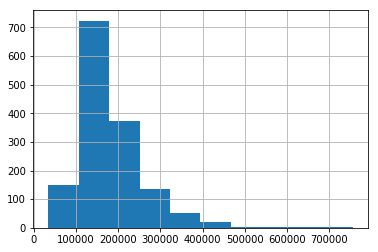

In [22]:
new_train.SalePrice.hist() #Price is scewed on a left

In [23]:
new_train.isnull().sum()

MSSubClass        0
LotFrontage     259
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
HalfBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
ScreenPorch       0
YrSold            0
SalePrice         0
dtype: int64

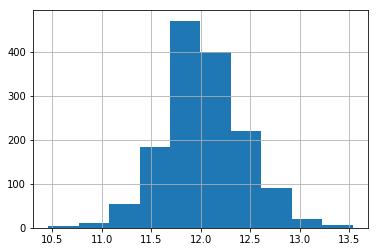

In [24]:
#Normalize SalePrice using log1p()
new_train['SalePrice'] = np.log1p(new_train['SalePrice'])

new_train.SalePrice.hist()

In [25]:
new_train.isnull().sum()

MSSubClass        0
LotFrontage     259
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
HalfBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
ScreenPorch       0
YrSold            0
SalePrice         0
dtype: int64

In [26]:
new_test.isnull().sum()

MSSubClass        0
LotFrontage     227
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea       15
TotalBsmtSF       1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
HalfBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      78
GarageCars        1
GarageArea        1
WoodDeckSF        0
OpenPorchSF       0
ScreenPorch       0
YrSold            0
dtype: int64

In [27]:
new_test.fillna(new_train.mean(), inplace=True)

In [28]:
#Breakdown dolumns into new numerical 
numerical = [col for col in new_test.columns if new_test.dtypes[col] != 'object']

print(numerical)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'YrSold']


In [29]:
#log transform skewed numeric features:
skewed = new_train[numerical].apply(lambda x: skew(x.dropna())) #compute skewness
#print(skewed_feats.loc[skewed_feats.values > 0.75])
skewed = skewed[skewed > 0.75]
skewed = skewed.index

new_train[skewed] = np.log1p(new_train[skewed])
new_test[skewed] = np.log1p(new_test[skewed])

new_train.shape, new_test.shape

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log1p
  import sys


((1460, 24), (1459, 23))

In [30]:
new_train = pd.get_dummies(new_train)
new_train = new_train.fillna(new_train.mean())

In [31]:
X_train, y_train = new_train.loc[:, new_train.columns != 'SalePrice'], new_train['SalePrice']

In [32]:
X_train.shape, y_train.shape

((1460, 23), (1460,))

In [33]:
#Normalize all the numerical fields using logarithm function
new_train[numerical] = np.log1p(new_train[numerical])

Text(0.5, 1.0, 'Check outliers in new_train')

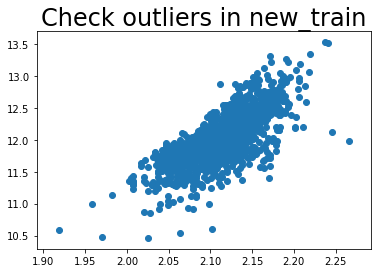

In [34]:
plt.scatter(new_train.GrLivArea, new_train.SalePrice)
plt.title('Check outliers in new_train', fontsize = 24)

In [35]:
def rmse(estimator, X, y):
    preds  = estimator.predict(X)
    error = np.sqrt(np.mean((preds - y)**2))
    return error

In [36]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor()

samples_per_leaf = [0.1, 0.5, 1, 5, 10, 15, 25, 50]
rf_scores = []


for num_samples in samples_per_leaf:
    rf.set_params(min_samples_leaf=num_samples)
    scores = cross_val_score(estimator=rf, X=X_train, y=y_train, scoring=rmse, cv=10)
    rf_scores.append((np.mean(scores), num_samples))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [37]:
min(rf_scores)

(0.15491414685947805, 5)

In [40]:
rf.set_params(min_samples_leaf = 5)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
new_test.isnull().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
ScreenPorch     0
YrSold          0
dtype: int64

In [43]:
new_test['Prediction'] = rf.predict(new_test)

In [44]:
np.exp(new_test.Prediction)

0       125677.431024
1       154013.616143
2       169336.291873
3       181576.959210
4       200250.477237
5       192071.105389
6       166242.678312
7       177109.576190
8       185299.571244
9       113193.060806
10      195547.197857
11       90280.897181
12       90818.110914
13      149378.682992
14      148944.231644
15      379833.824294
16      266197.261144
17      315449.902522
18      269186.537692
19      439483.663535
20      342597.386989
21      205284.600101
22      174427.091314
23      177843.166797
24      171272.054953
25      201699.052242
26      356591.230366
27      250327.388516
28      201688.312490
29      187741.472334
            ...      
1429     90098.490401
1430    141323.878646
1431     65823.648518
1432    124368.528497
1433     66524.628218
1434    265365.860717
1435    253439.766210
1436    210137.104712
1437    163338.742595
1438    245652.056880
1439    158417.687545
1440    186702.750951
1441    183133.959867
1442    325675.379432
1443    32

In [45]:
output = pd.DataFrame({
    'Id'       : np.arange(1461, 2920),
    'SalePrice': np.exp(new_test.Prediction)
})

In [46]:
output.tail()

,Id,SalePrice
1454,2915,80688.108698
1455,2916,90896.479704
1456,2917,162996.919093
1457,2918,113797.012266
1458,2919,243803.496674


In [47]:
output.to_csv('/Users/olgakliuchnik/Desktop/sample_predictions_5.csv', index=False)

In [48]:
print(rmse(rf, X_train, y_train))

0.10561619233319763


In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
print(rmse(lr, X_train, y_train))

0.1419891413043225


In [51]:
rreg = Ridge()
alphas = [0.005, 0.01, 0.1, 1, 10]

# Train the model with different regularisation strengths
for a in alphas:
    rreg.set_params(alpha=a)
    rreg.fit(X_train, y_train)

In [52]:
print(rmse(rreg, X_train, y_train))

0.14267072342913578


In [53]:
lareg = Lasso()
alphas = [1, 0.1, 0.01, 0.0005]

# Train the model with different regularisation strengths
for a in alphas:
    lareg.set_params(alpha=a)
    lareg.fit(X_train, y_train)

In [54]:
print(rmse(lareg, X_train, y_train))

0.14207276610821437
